In [1]:
#拿cifar10資料集
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [2]:
#看一下每筆資料
print(x_train.shape)
print(x_test.shape)
#不同於先前的minst,這裡的1是表示欄位1，主要是為了未來多種類識別(一張圖裡有多個物件)，做擴充保留
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [3]:
# !!! (50000, 1) =/= (50000, )
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [4]:
#答案原本是0~9，分別用字串代入，印出時比較容易識別
#在一次修改多個字串的方式：快捷鍵按下alt，再點選你想要處理的多行程式碼 >就可以多行處理
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

automobile


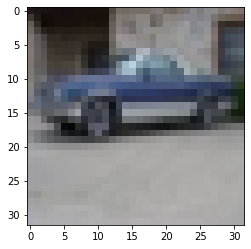

In [5]:
import matplotlib.pyplot as plt
idx = 10000
#這裡直接把答案的數字指到trans的index,就可以印出物件名
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [7]:
#這裡開始模仿VG-16的作法>先Conv2D再Pppling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#Flatten是攤開成一維
from tensorflow.keras.layers import Dense, Flatten ,Dropout

layers = [
    # CNN萃取特徵,第一次input_shape要先給,層數從64開始
    # 1D>一維,EX:音訊 2D:會包含資訊(寬,高,值)
    # 回來做調餐，Conv2D > 上升 , Dense > 下降 ，維持參數總量
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    #256 > 512
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    # MLP,開始攤開>做全連接
    Flatten(),
    Dense(256, activation="relu"),
    #Dropout用來刻意把部分特徵拿掉，讓其他特徵也能參與，丟掉1/4，通常用在Dense與Dense之間,range 1/2~1/4
    Dropout(0.25),
    #最後收到10層,因為結果是互斥的,所以要用softmax
    Dense(10, activation="softmax")
]
model = Sequential(layers)
#這裡因為印出來欄位沒有對齊,把行寬加大
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d_3 (Conv2D)                           (None, 32, 32, 64)                      1792           
                                                                                                    
 max_pooling2d_3 (MaxPooling2D)              (None, 16, 16, 64)                      0              
                                                                                                    
 conv2d_4 (Conv2D)                           (None, 16, 16, 128)                     73856          
                                                                                                    
 max_pooling2d_4 (MaxPooling2D)              (None, 8, 8, 128)                       0              
                                                                       

In [8]:
# 一個輸出(二元分類): BinaryCrossEntropy p log 1/q + (1 - p) log 1/1-q
# 多個輸出(多元分類): CategoricalCrossEntropy pi log1/qi
from tensorflow.keras.losses import SparseCategoricalCrossentropy
#這裡用Sparse可以省記憶體&運算時間
model.compile(loss=SparseCategoricalCrossentropy(),
              # "adam"也可以
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [10]:
# batch_size: 看多少筆, 做一次梯度下降(幾10~幾100)
# epochs: 所有資料看幾輪(負責結束訓練)
# batch_size=200
# 一epochs: 54000 / 200 = 270(次梯度下降)
# verbose=0(quiet) 1(default) 2(no bar)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 39s - loss: 1.5484 - accuracy: 0.4370 - val_loss: 1.2443 - val_accuracy: 0.5566 - 39s/epoch - 173ms/step
Epoch 2/100
225/225 - 8s - loss: 1.1016 - accuracy: 0.6102 - val_loss: 0.9812 - val_accuracy: 0.6492 - 8s/epoch - 37ms/step
Epoch 3/100
225/225 - 8s - loss: 0.9056 - accuracy: 0.6820 - val_loss: 0.8224 - val_accuracy: 0.7096 - 8s/epoch - 38ms/step
Epoch 4/100
225/225 - 8s - loss: 0.7715 - accuracy: 0.7299 - val_loss: 0.7308 - val_accuracy: 0.7484 - 8s/epoch - 38ms/step
Epoch 5/100
225/225 - 9s - loss: 0.6589 - accuracy: 0.7702 - val_loss: 0.7135 - val_accuracy: 0.7522 - 9s/epoch - 38ms/step
Epoch 6/100
225/225 - 8s - loss: 0.5748 - accuracy: 0.7990 - val_loss: 0.6713 - val_accuracy: 0.7764 - 8s/epoch - 38ms/step
Epoch 7/100
225/225 - 8s - loss: 0.4809 - accuracy: 0.8308 - val_loss: 0.6623 - val_accuracy: 0.7794 - 8s/epoch - 38ms/step
Epoch 8/100
225/225 - 8s - loss: 0.4084 - accuracy: 0.8576 - val_loss: 0.7035 - val_accuracy: 0.7632 - 8s/epoch - 37ms/step
Epoch

In [11]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.7022 - accuracy: 0.7653


[0.7022429704666138, 0.7652999758720398]